In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
37717,39076,1.117749,-1.544665,-0.145357,-1.307482,-1.392833,-0.630833,-0.563659,-0.038716,-2.173892,...,-0.334155,-1.108220,0.070461,0.115485,0.078726,-0.460844,-0.029143,0.029028,183.19,0.0
37718,39076,0.758729,-0.483875,0.125488,1.449159,-0.639231,-0.805011,0.406994,-0.221212,0.068777,...,0.210712,0.063091,-0.316636,0.394472,0.558720,-0.304812,-0.033008,0.063331,250.00,0.0
37719,39076,-0.474907,0.835804,0.075878,-1.251283,2.492736,3.385419,0.169507,0.934749,-0.584224,...,-0.270398,-0.866353,-0.085720,0.986274,-0.082934,0.084198,0.310936,0.170342,1.49,0.0
37720,39077,-2.682780,-2.028562,1.745223,-1.157952,-0.143692,-0.807503,-1.154141,0.436917,-0.293442,...,0.353396,0.968145,-0.776459,0.182662,-0.000427,-0.209058,0.256991,-0.585781,102.00,0.0
37721,39077,1.106292,-0.525727,0.926440,0.817696,-1.122177,-0.062703,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37722 entries, 0 to 37721
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    37722 non-null  int64  
 1   V1      37722 non-null  float64
 2   V2      37722 non-null  float64
 3   V3      37722 non-null  float64
 4   V4      37722 non-null  float64
 5   V5      37722 non-null  float64
 6   V6      37722 non-null  float64
 7   V7      37721 non-null  float64
 8   V8      37721 non-null  float64
 9   V9      37721 non-null  float64
 10  V10     37721 non-null  float64
 11  V11     37721 non-null  float64
 12  V12     37721 non-null  float64
 13  V13     37721 non-null  float64
 14  V14     37721 non-null  float64
 15  V15     37721 non-null  float64
 16  V16     37721 non-null  float64
 17  V17     37721 non-null  float64
 18  V18     37721 non-null  float64
 19  V19     37721 non-null  float64
 20  V20     37721 non-null  float64
 21  V21     37721 non-null  float64
 22

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,1
V8,1
V9,1


In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0.0,37618
1.0,103


In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(37618, 31)
(103, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,37618.000000
mean,86.017411
std,232.957939
min,0.000000
25%,7.300000
50%,22.880000
75%,77.675000
max,7879.420000


In [ ]:
fraud.Amount.describe()

,Amount
count,103.000000
mean,90.471165
std,247.173335
min,0.000000
25%,1.000000
50%,3.760000
75%,99.990000
max,1809.680000


In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,24778.212797,-0.186787,0.044196,0.749331,0.176750,-0.209569,0.105912,-0.092989,0.025693,0.243321,...,0.044683,-0.032046,-0.111604,-0.040404,0.007159,0.135739,0.021382,0.007030,0.003658,86.017411
1.0,20498.291262,-7.762676,5.838647,-10.957218,5.911555,-5.453798,-2.306085,-7.743100,3.867920,-2.961800,...,0.652319,0.628539,-0.354537,-0.362138,-0.234731,0.300023,0.180390,0.822304,0.102481,90.471165


In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
16660,28023,-0.529826,-0.568514,2.417954,-2.634611,-0.949301,0.140658,-0.283628,0.024578,-2.372197,...,0.032722,0.514877,-0.241400,0.000720,0.230358,-0.203902,-0.096033,-0.167057,42.00,0.0
5695,5963,-0.639569,-0.173953,2.395093,-2.398385,-1.190948,-0.400312,-0.644067,0.109593,-1.022246,...,-0.165681,0.129695,-0.278404,0.238205,0.341697,-0.223452,0.275049,0.111419,11.10,0.0
5017,4610,-0.927913,1.629688,1.983769,1.111621,0.032919,-0.763236,0.739622,-0.521593,0.764524,...,-0.455862,-0.647964,-0.016118,0.657201,-0.017083,0.289868,-0.007996,-0.029817,1.29,0.0
30099,35770,1.191861,-0.642558,0.366401,-0.289622,-0.209533,1.382770,-0.881235,0.483191,1.168391,...,-0.259398,-0.577796,-0.132678,-1.655094,0.228493,1.061599,-0.033352,-0.013485,36.71,0.0
25318,33556,1.057692,0.130524,0.060807,1.151879,0.607388,1.166499,-0.053788,0.389188,0.102521,...,0.077981,0.522157,-0.011780,-0.945773,0.510862,-0.130902,0.078201,-0.002251,1.00,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30442,35926,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,...,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,4.56,1.0
30473,35942,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,...,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46,1.0
30496,35953,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,...,1.194888,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,111.70,1.0
31002,36170,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,...,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,111.70,1.0
33276,37167,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31,1.0


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,103


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,24761.552846,-0.085858,-0.038166,0.832832,0.237844,-0.254702,0.081502,-0.065298,0.057855,0.272719,...,0.023241,-0.042043,-0.095952,-0.033919,0.013839,0.145414,0.032709,-0.011806,-0.002982,89.907398
1.0,20498.291262,-7.762676,5.838647,-10.957218,5.911555,-5.453798,-2.306085,-7.743100,3.867920,-2.961800,...,0.652319,0.628539,-0.354537,-0.362138,-0.234731,0.300023,0.180390,0.822304,0.102481,90.471165


In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
16660  28023 -0.529826 -0.568514  2.417954 -2.634611 -0.949301  0.140658   
5695    5963 -0.639569 -0.173953  2.395093 -2.398385 -1.190948 -0.400312   
5017    4610 -0.927913  1.629688  1.983769  1.111621  0.032919 -0.763236   
30099  35770  1.191861 -0.642558  0.366401 -0.289622 -0.209533  1.382770   
25318  33556  1.057692  0.130524  0.060807  1.151879  0.607388  1.166499   
...      ...       ...       ...       ...       ...       ...       ...   
30442  35926 -3.896583  4.518355 -4.454027  5.547453 -4.121459 -1.163407   
30473  35942 -4.194074  4.382897 -5.118363  4.455230 -4.812621 -1.224645   
30496  35953 -4.844372  5.649439 -6.730396  5.252842 -4.409566 -1.740767   
31002  36170 -5.685013  5.776516 -7.064977  5.902715 -4.715564 -1.755633   
33276  37167 -7.923891 -5.198360 -3.000024  4.420666  2.272194 -3.394483   

             V7        V8        V9  ...       V20       V21       V22  \
16660 -0.2836

In [ ]:
print(Y)

16660    0.0
5695     0.0
5017     0.0
30099    0.0
25318    0.0
        ... 
30442    1.0
30473    1.0
30496    1.0
31002    1.0
33276    1.0
Name: Class, Length: 595, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(595, 30) (476, 30) (119, 30)


In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9915966386554622


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9747899159663865


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nConfusion Matrix:\n", confusion_matrix(Y_test, X_test_prediction))
print("\nClassification Report:\n", classification_report(Y_test, X_test_prediction))



Confusion Matrix:
 [[97  1]
 [ 2 19]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        98
         1.0       0.95      0.90      0.93        21

    accuracy                           0.97       119
   macro avg       0.96      0.95      0.96       119
weighted avg       0.97      0.97      0.97       119



In [ ]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)


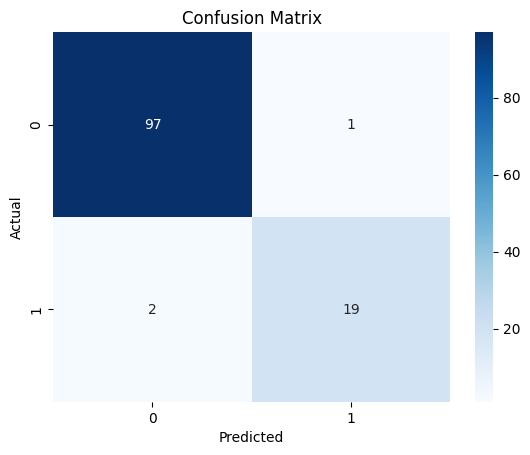

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC AUC Score: 0.9766763848396502


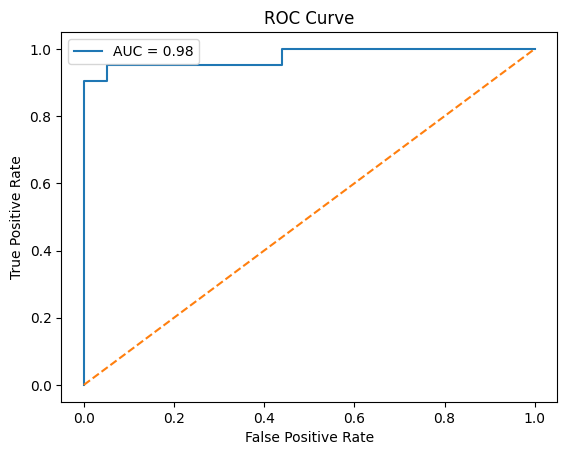

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make sure model is fitted
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, Y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# AUC
auc = roc_auc_score(Y_test, y_probs)
print("ROC AUC Score:", auc)

# ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_probs)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
y_rf_pred = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(Y_test, y_rf_pred))  # or y_xgb_pred
print(confusion_matrix(Y_test, y_rf_pred))
print("AUC Score:", roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        98
         1.0       1.00      0.90      0.95        21

    accuracy                           0.98       119
   macro avg       0.99      0.95      0.97       119
weighted avg       0.98      0.98      0.98       119

[[98  0]
 [ 2 19]]
AUC Score: 0.9606413994169095


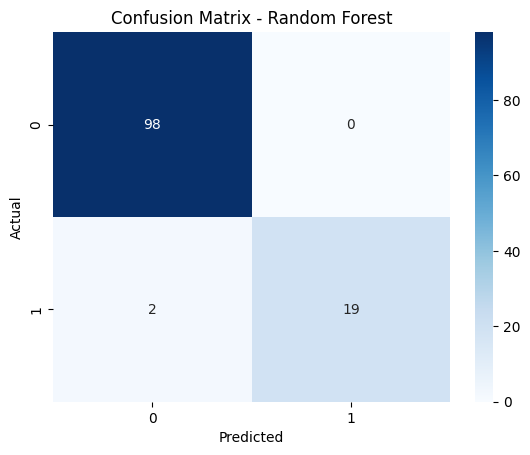

In [ ]:
# Confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, y_rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


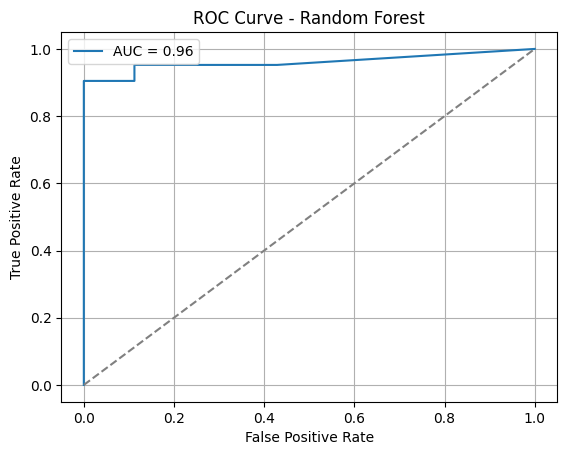

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(Y_test, rf_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:, 1]):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import joblib
joblib.dump(rf_model, 'fraud_model.pkl')  # Save


['fraud_model.pkl']